## <center>Spline</center>
A spline is a special type of piecewise polynomial interpolant: a piecewise polynomial of degree k is a spline if it
is continuously differentiable k − 1 times. The most popular choice is the third-order spline, k = 3, which requires
4(n − 1) parameters. The SciPy interpolate module provides several functions and classes for performing spline
interpolation. For example, we can use the interpolate.interp1d function, which takes x and y arrays for the data
points as first and second arguments. The optional keyword argument kind can be used to specify the type and order of
the interpolation. In particular, we can set kind=3 (or, equivalently, kind='cubic') to compute the cubic spline.


In [1]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

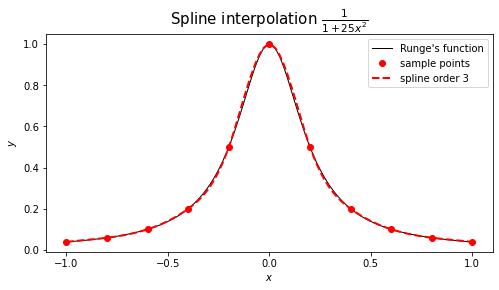

In [2]:
runge = lambda x: 1 / (1 + 25 * x ** 2)

x = np.linspace(-1, 1, 11)
y = runge(x)
f_i = interpolate.interp1d(x, y, kind=3)

xx = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f_i(xx), 'r--', lw=2, label='spline order 3')
ax.legend()
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=10)
ax.set_xlabel(r"$x$", fontsize=10)
ax.set_title(r"Spline interpolation $\frac{1}{1 + 25 x^2}$", fontsize=15)

plt.show()

### Multivariate Interpolation
Polynomial and spline interpolations can be straightforwardly generalized to multivariate situations. In analogy with
the univariate case, we seek a function whose values are given at a set of specified points and that can be evaluated
for intermediary points within the sampled range. SciPy provides several functions and classes for multivariate
interpolation, and in the following two examples, we explore two of the most useful functions for bivariate
interpolation: the interpolate.interp2d and interpolate.griddata functions, respectively

interpolate.interp2d, which is a straightforward generalization of the interp1d function that we previously used.
This function takes the x and y coordinates of the available data points as separate one-dimensional arrays, followed
by a two-dimensional array of values for each combination of x and y coordinates.

In [3]:
x = y = np.linspace(-2, 2, 10)

def f(x, y):
    return np.exp(-(x + .5) ** 2 - 2 * (y + .5) ** 2) - np.exp(-(x - .5) ** 2 - 2 * (y - .5) ** 2)


X, Y = np.meshgrid(x, y)
# Adding  noisy data at fixed grid points X, Y
Z = f(X, Y) + 0.05 * np.random.randn(*X.shape)

In [4]:
f_i = interpolate.interp2d(x, y, Z, kind='cubic')  # Note that here x and y are one-dimensional arrays (of length 10),
# and Z is a two-dimensional array of shape (10, 10). The interp2d function returns a class instance, here f_i, that
# behaves as a function that we can evaluate at arbitrary x and y coordinates (within the sampled range).

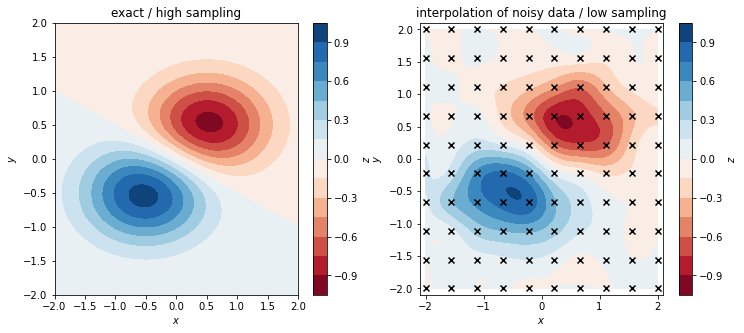

In [5]:
# Graphical representation

xx = yy = np.linspace(min(x), max(x), 100)
ZZi = f_i(xx, yy)  # despite being a 2D, the f_i function only takes 1D
XX, YY = np.meshgrid(xx, yy)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# for reference, first plot the contours of the exact function
c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=10)
axes[0].set_ylabel(r"$y$", fontsize=10)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=10)
# next, plot the contours of the supersampled interpolation of the noisy data
c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=10)
axes[1].set_ylabel(r"$y$", fontsize=10)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=10)

plt.show()

For higher-dimensional problems, there is a function interpolate.interpnd, which is a generalization
to N-dimensional problems.

In SciPy we can use the interpolate.griddata for exactly this task. This function takes as first argument. a tuple of
one-dimensional coordinate vectors (xdata, ydata) for the data values zdata, which are passed to the function in
matrix form as third argument. The fourth argument is a tuple (X, Y) of coordinate vectors or coordinate matrices for
the new points at which the interpolant is to be evaluated. Optionally, we can also set the interpolation method using
the method keyword argument ('nearest', 'linear', or 'cubic')

In [6]:
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

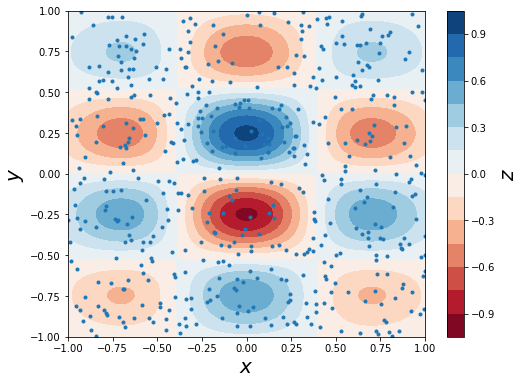

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

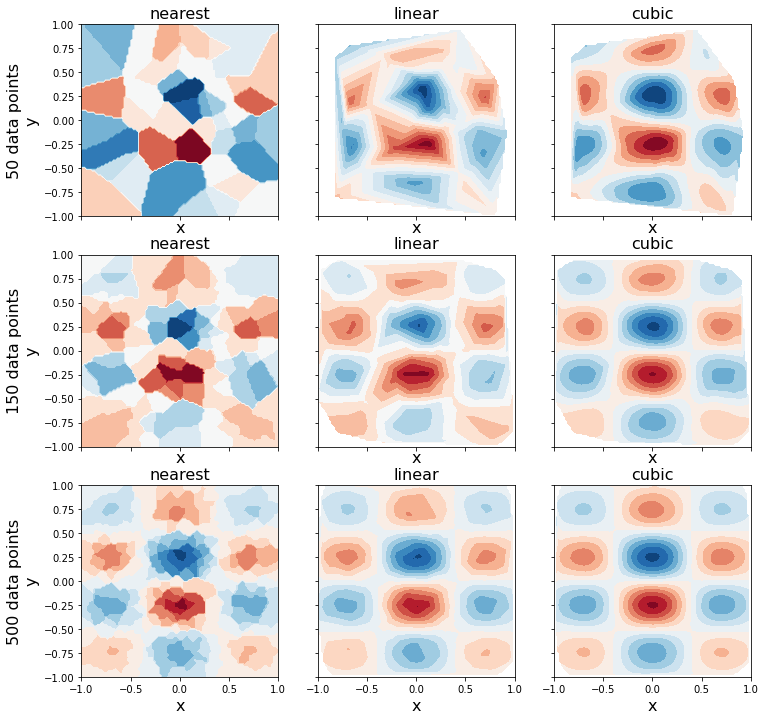

In [9]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3


fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
n_vec = [50, 150, 500]
for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)
    for m in range(len(n_vec)):
        axes[idx, m].set_xlabel("x", fontsize=16)
